# Installing necessary packages
install.packages("corrplot")
install.packages("GGally")
install.packages("ggrepel")
install.packages("dplyr")

In [1]:

# Importing necessary libraries
library("tidyverse")
library("ggplot2")
library("ggrepel")
library("ggcorrplot")
library("DT")
library(dplyr)
library(tidyr)
library(dplyr)
library(GGally)
library(ggrepel)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library("ggrepel"): there is no package called ‘ggrepel’


# COVID-19_cases_plus_census

In [2]:
# Retrieve "COVID-19_cases_plus_census.csv" file
dataset_plus_census <- read.csv("https://raw.githubusercontent.com/yamphurai/Data_Mining_Project1/refs/heads/main/COVID-19_cases_plus_census.csv")

## Freature Processing

In [5]:
sum(is.na(dataset_plus_census))

[1] 31577

In [6]:
# Create a new column 'rent_under_50_percent' to add the values from columns with rent 50% and below (keep the column "rent_over_50_percent" as it is)
dataset_plus_census <- dataset_plus_census %>%
  mutate(rent_under_50_percent = rent_40_to_50_percent +
                                  rent_35_to_40_percent +
                                  rent_30_to_35_percent +
                                  rent_25_to_30_percent +
                                  rent_20_to_25_percent +
                                  rent_15_to_20_percent +
                                  rent_10_to_15_percent +
                                  rent_under_10_percent)

In [7]:
# Inspect first 10 values for the new column
head(dataset_plus_census$rent_under_50_percent)

[1]   411 16148 13483  8510  4211 10033

Calculating the sum of the values in the first row in the columns for rents spent below 50% is $411. Same is true for the second row i.e. $16,148.
This tells that the new column has been created correctly

In [8]:
# Checking the new values in the new column
str(dataset_plus_census$rent_under_50_percent)

 num [1:3142] 411 16148 13483 8510 4211 ...


All the data in the new column is of numerical type.

In [9]:
# Now these feature columns can be dropped
dataset_plus_census <- dataset_plus_census %>%
  select(-rent_40_to_50_percent, -rent_35_to_40_percent, -rent_30_to_35_percent, -rent_25_to_30_percent, -rent_burden_not_computed,
         -rent_20_to_25_percent, -rent_15_to_20_percent, -rent_10_to_15_percent, -rent_under_10_percent)

In [10]:
# We will also not consider structure of the families for our analysis and rather maintain focus on the financial structure of the families
dataset_plus_census <- dataset_plus_census %>%
  select(-families_with_young_children, -two_parent_families_with_young_children, -two_parents_in_labor_force_families_with_young_children,
         -two_parents_father_in_labor_force_families_with_young_children, -two_parents_mother_in_labor_force_families_with_young_children,
         -two_parents_not_in_labor_force_families_with_young_children, -one_parent_families_with_young_children, -father_one_parent_families_with_young_children,
        -father_in_labor_force_one_parent_families_with_young_children)

In [11]:
length(names(dataset_plus_census))

[1] 242

In [12]:
# Similar to the above reasoning, we will ignore statistics on housing data
dataset_plus_census <- dataset_plus_census %>%
  select(-housing_units, -vacant_housing_units, -vacant_housing_units_for_rent, -vacant_housing_units_for_sale, -owner_occupied_housing_units,
         -million_dollar_housing_units, -mortgaged_housing_units, -owner_occupied_housing_units_lower_value_quartile, -owner_occupied_housing_units_median_value,
        -owner_occupied_housing_units_upper_value_quartile, -occupied_housing_units, -married_households, -housing_units_renter_occupied,
         -median_year_structure_built)

In [13]:
length(names(dataset_plus_census))

[1] 228

In [14]:
# Create a new columns 'income_less_50K', "income_50K_100K', "income_100K-150K" , "income_150K_more" to group the columns related to income levels
dataset_plus_census <- dataset_plus_census %>%
  mutate(income_less_50K = income_less_10000 + income_10000_14999 + income_15000_19999 + income_20000_24999 + income_25000_29999 + income_30000_34999 +
         income_35000_39999  + income_40000_44999 + income_45000_49999)

dataset_plus_census <- dataset_plus_census %>%
  mutate(income_50K_100K = income_50000_59999 + income_60000_74999 + income_75000_99999)

dataset_plus_census <- dataset_plus_census %>%
  mutate(income_100K_150K = income_100000_124999 + income_125000_149999)

dataset_plus_census <- dataset_plus_census %>%
  mutate(income_150K_more = income_150000_199999 + income_200000_or_more)


In [15]:
# Now the old columns related to the income levels can be dropped
dataset_plus_census <- dataset_plus_census %>%
  select(-income_less_10000, -income_10000_14999, -income_15000_19999, -income_20000_24999, -income_25000_29999, -income_30000_34999, -income_35000_39999,
         -income_40000_44999, -income_45000_49999, -income_50000_59999, -income_60000_74999, -income_75000_99999, -income_100000_124999, -income_125000_149999,
        -income_150000_199999, -income_200000_or_more)

In [ ]:
length(names(dataset_plus_census))

[1] 216

In [16]:
# Data on the dwelling and the built year of the houses are not significant to our analysis so those columns are dropped
dataset_plus_census <- dataset_plus_census %>%
  select(-renter_occupied_housing_units_paying_cash_median_gross_rent, -dwellings_1_units_detached, -dwellings_1_units_attached, -dwellings_2_units, -dwellings_3_to_4_units,
         -dwellings_5_to_9_units, -dwellings_10_to_19_units, -dwellings_20_to_49_units, -dwellings_50_or_more_units, -mobile_homes, -housing_built_2005_or_later,
         -housing_built_2000_to_2004, -housing_built_1939_or_earlier)

In [ ]:
length(names(dataset_plus_census))

[1] 203

In [17]:
# We will group the ages of males and females from 0-20, 21-49, 50 above. So the relevant feature columns are dropped
dataset_plus_census <- dataset_plus_census %>%
  mutate(male_0_20 = male_under_5 + male_5_to_9 + male_10_to_14 + male_15_to_17 + male_18_to_19 + male_20)

dataset_plus_census <- dataset_plus_census %>%
  mutate(male_21_49 = male_21 + male_22_to_24 + male_25_to_29 + male_30_to_34 + male_35_to_39 + male_40_to_44 + male_45_to_49)

dataset_plus_census <- dataset_plus_census %>%
  mutate(male_50_above = male_50_to_54 + male_55_to_59 + male_60_61 + male_62_64 + male_65_to_66 + male_67_to_69 + male_67_to_69 + male_70_to_74 + male_75_to_79 + male_80_to_84 + male_85_and_over)

dataset_plus_census <- dataset_plus_census %>%
  mutate(female_0_20 = female_under_5 + female_5_to_9 + female_10_to_14 + female_15_to_17 + female_18_to_19 + female_20)

dataset_plus_census <- dataset_plus_census %>%
  mutate(female_21_49 = female_21 + female_22_to_24 + female_25_to_29 + female_30_to_34 + female_35_to_39 + female_40_to_44 + female_45_to_49)

dataset_plus_census <- dataset_plus_census %>%
  mutate(female_50_above = female_50_to_54 + female_55_to_59 + female_60_to_61 + female_62_to_64 + female_65_to_66 + female_67_to_69 + female_70_to_74 + female_75_to_79 + female_75_to_79 + female_80_to_84 + female_85_and_over)

# Drop the feature columns now
dataset_plus_census <- dataset_plus_census %>%
  select(-male_under_5, -male_5_to_9, -male_10_to_14, -male_15_to_17, -male_18_to_19, -male_20, -male_21, -male_22_to_24, -male_25_to_29, -male_30_to_34,
         -male_35_to_39, -male_40_to_44, -male_45_to_49, -male_50_to_54, -male_55_to_59, -male_60_61, -male_62_64, -male_65_to_66, -male_67_to_69, -male_67_to_69,
         -male_70_to_74, -male_75_to_79, -male_80_to_84, -male_85_and_over,

         -female_under_5, -female_5_to_9, -female_10_to_14, -female_15_to_17, -female_18_to_19, -female_20, -female_21, -female_22_to_24, -female_25_to_29,
         -female_30_to_34, -female_35_to_39, -female_40_to_44, -female_45_to_49, -female_50_to_54, -female_55_to_59, -female_60_to_61, -female_62_to_64, -female_65_to_66, -female_67_to_69, -female_70_to_74,
         -female_75_to_79, -female_80_to_84, -female_85_and_over)

In [ ]:
length(names(dataset_plus_census))

[1] 163

In [18]:
# Drop the columns with values related to multiple races to limit the focus on data on a single race
dataset_plus_census <- dataset_plus_census %>%
  select(-white_including_hispanic, -black_including_hispanic, -amerindian_including_hispanic, -asian_including_hispanic, -two_or_more_races_pop, -not_hispanic_pop)

In [ ]:
length(names(dataset_plus_census))

[1] 157

In [19]:
# The data on the education status of the people are not significant to our analysis so the relevant columns are dropped
dataset_plus_census <- dataset_plus_census %>%
  select(-one_year_more_college, -masters_degree, -less_one_year_college, -high_school_diploma, -bachelors_degree, -associates_degree)

In [ ]:
length(names(dataset_plus_census))

[1] 151

In [20]:
# Since we are already considering the age of males and females separately, we can drop other similar but irrelevant columns
dataset_plus_census <- dataset_plus_census %>%
  select(-population_1_year_and_over, -population_3_years_over, -pop_determined_poverty_status, -pop_25_64)


In [ ]:
length(names(dataset_plus_census))

[1] 147

In [21]:
# Group all the data of the columns containing data related to commuting to work regardless of time spend to commute
dataset_plus_census <- dataset_plus_census %>%
  mutate(commute =  commuters_drove_alone + commuters_by_subway_or_elevated + commuters_by_car_truck_van + commuters_by_carpool + commuters_by_bus +
         commuters_by_public_transportation)

In [22]:
# Dropping the relevant columns for commute time & previously modified columns
dataset_plus_census <- dataset_plus_census %>%
  select(-commute_10_14_mins, -commute_15_19_mins, -commute_20_24_mins, -commute_25_29_mins, -commute_30_34_mins, -commute_35_44_mins, -commute_45_59_mins,
         -commute_5_9_mins, -commute_35_39_mins, -commute_40_44_mins, -commute_60_89_mins, -commuters_16_over, -commute_90_more_mins, -commuters_by_bus,
         -commuters_by_car_truck_van, -commuters_by_carpool, -commuters_by_subway_or_elevated, -commuters_drove_alone, -commute_60_more_mins, -commute_35_44_mins,
         -commute_60_more_mins, -commute_less_10_mins, -commuters_by_bus, -commuters_by_public_transportation )

In [ ]:
length(names(dataset_plus_census))

[1] 127

In [23]:
# We are already considering male/female and age redated data. So these columns are dropped
dataset_plus_census <- dataset_plus_census %>%
  select(-white_male_55_64, -white_male_45_54, -hispanic_male_55_64, -hispanic_male_45_54, -black_male_55_64, -black_male_45_54, -asian_male_55_64, -asian_male_45_54,
         -family_households, -nonfamily_households)

In [ ]:
length(names(dataset_plus_census))

[1] 117

In [24]:
# Drop remaining irrelevant columns
dataset_plus_census <- dataset_plus_census %>%
  select(-households, -income_per_capita, -percent_income_spent_on_rent, -median_rent, -hispanic_any_race, -speak_only_english_at_home,
        -speak_spanish_at_home, -speak_spanish_at_home_low_english, -pop_5_years_over, -pop_15_and_over, -pop_never_married, -pop_now_married, -pop_separated, -pop_widowed,
         -pop_divorced, -pop_25_years_over, -poverty, -workers_16_and_over, -some_college_and_associates_degree, -sales_office_employed, -one_car, -two_cars, -three_cars, -four_more_cars,
          -aggregate_travel_time_to_work, -occupation_management_arts, -occupation_natural_resources_construction_maintenance, -occupation_production_transportation_material, -occupation_sales_office, -occupation_services, -not_us_citizen_pop,
         -management_business_sci_arts_employed, -male_male_households, -male_45_to_64, -male_45_64_some_college, -male_45_64_high_school, -male_45_64_grade_9_12, -male_45_64_less_than_9_grade,
         -male_45_64_graduate_degree, -male_45_64_associates_degree, -less_than_high_school_graduate, -in_undergrad_college, -in_school, -in_grades_9_to_12, -in_grades_5_to_8, -in_grades_1_to_4,
         -high_school_including_ged, -group_quarters, -graduate_professional_degree, -gini_index, -female_female_households, -employed_wholesale_trade, -employed_transportation_warehousing_utilities,
         -employed_science_management_admin_waste, -employed_retail_trade, -employed_public_administration, -employed_other_services_not_public_admin, -employed_manufacturing, -employed_information,
         -employed_finance_insurance_real_estate, -employed_education_health_social, -employed_construction, -employed_arts_entertainment_recreation_accommodation_food, -employed_agriculture_forestry_fishing_hunting_mining,
         -households_public_asst_or_food_stamps, -different_house_year_ago_same_city, -different_house_year_ago_different_city, -children_in_single_female_hh, -children, -bachelors_degree_or_higher_25_64,
         -bachelors_degree_2, -pop_in_labor_force, -pop_16_over, -not_in_labor_force, -civilian_labor_force, -armed_forces, -households_retirement_income, -no_cars, -no_car,
        -male_45_64_bachelors_degree, -date, -do_date, -county_fips_code, -geo_id)


In [25]:
# Remaining feature columns
print(length(names(dataset_plus_census)))
print(names(dataset_plus_census))
sum(is.na(dataset_plus_census))

[1] 33
 [1] "county_name"           "state"                 "state_fips_code"      
 [4] "confirmed_cases"       "deaths"                "rent_over_50_percent" 
 [7] "total_pop"             "male_pop"              "female_pop"           
[10] "median_age"            "white_pop"             "black_pop"            
[13] "asian_pop"             "hispanic_pop"          "amerindian_pop"       
[16] "other_race_pop"        "median_income"         "employed_pop"         
[19] "unemployed_pop"        "walked_to_work"        "worked_at_home"       
[22] "rent_under_50_percent" "income_less_50K"       "income_50K_100K"      
[25] "income_100K_150K"      "income_150K_more"      "male_0_20"            
[28] "male_21_49"            "male_50_above"         "female_0_20"          
[31] "female_21_49"          "female_50_above"       "commute"              


[1] 0

After all the necessary feature processing completed, there are 33 variables left in the dataset. These variables will be used to conduct all the data mining of our interest.
We can also see that there are no missing values in any of the feature columns.

In [26]:
# Rearrange the columns in the specified order
dataset_plus_census <- dataset_plus_census %>%
  select(
    state, state_fips_code, county_name,
    confirmed_cases, deaths,
    total_pop, male_pop, female_pop,
    white_pop, black_pop, asian_pop, hispanic_pop, amerindian_pop, other_race_pop,
    median_income, income_less_50K, income_50K_100K, income_100K_150K, income_150K_more,
    rent_under_50_percent, rent_over_50_percent,
    median_age, male_0_20, male_21_49, male_50_above, female_0_20, female_21_49, female_50_above,
    unemployed_pop, employed_pop, commute, worked_at_home, walked_to_work
  )

# Save the updated dataset to a CSV file
write.csv(dataset_plus_census, "updated_dataset_plus_census.csv", row.names = FALSE)

## New Dataset

In [27]:
# Structure of the final dataset
str(dataset_plus_census)

'data.frame':	3142 obs. of  33 variables:
 $ state                : chr  "VT" "VT" "DE" "RI" ...
 $ state_fips_code      : int  50 50 10 44 33 44 50 9 50 50 ...
 $ county_name          : chr  "Essex County" "Chittenden County" "Kent County" "Washington County" ...
 $ confirmed_cases      : int  111 3636 11548 5521 2496 3578 312 6255 527 307 ...
 $ deaths               : int  0 78 187 122 79 6 1 125 5 4 ...
 $ total_pop            : num  6203 160985 173145 126190 60383 ...
 $ male_pop             : num  3135 78928 83544 61154 29705 ...
 $ female_pop           : num  3068 82057 89601 65036 30678 ...
 $ white_pop            : num  5929 143657 108627 115206 57523 ...
 $ black_pop            : num  64 4091 41729 1621 285 ...
 $ asian_pop            : num  32 6144 3459 2436 579 ...
 $ hispanic_pop         : num  83 3542 11820 3769 951 ...
 $ amerindian_pop       : num  20 374 967 1047 130 ...
 $ other_race_pop       : num  6 240 377 260 65 159 0 336 57 9 ...
 $ median_income        : num  38

In [28]:
sum(is.na(dataset_plus_census))

[1] 0

In [37]:
# Using duplicated function on the entire dataset to find duplicate rows
duplicate_indices <- which(duplicated(dataset_plus_census))

# Print out the index numbers of duplicate observations
if (length(duplicate_indices) > 0) {
  cat("Duplicate observations found at the following indices:\n")
  print(duplicate_indices)
} else {
  cat("No duplicate observations found in the dataset.")
}

No duplicate observations found in the dataset.

In [29]:
summary(dataset_plus_census)

    state           state_fips_code county_name        confirmed_cases    
 Length:3142        Min.   : 1.00   Length:3142        Min.   :      0.0  
 Class :character   1st Qu.:18.00   Class :character   1st Qu.:    796.2  
 Mode  :character   Median :29.00   Mode  :character   Median :   1916.5  
                    Mean   :30.28                      Mean   :   7558.9  
                    3rd Qu.:45.00                      3rd Qu.:   4955.0  
                    Max.   :56.00                      Max.   :1002614.0  
     deaths          total_pop           male_pop         female_pop     
 Min.   :    0.0   Min.   :      74   Min.   :     39   Min.   :     35  
 1st Qu.:   12.0   1st Qu.:   10945   1st Qu.:   5514   1st Qu.:   5460  
 Median :   31.0   Median :   25692   Median :  12798   Median :  12885  
 Mean   :  124.8   Mean   :  102166   Mean   :  50292   Mean   :  51873  
 3rd Qu.:   77.0   3rd Qu.:   67445   3rd Qu.:  33481   3rd Qu.:  34108  
 Max.   :13936.0   Max.   :1010

## Relationship between confirmed cases and death for a state

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“ggrepel: 24 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


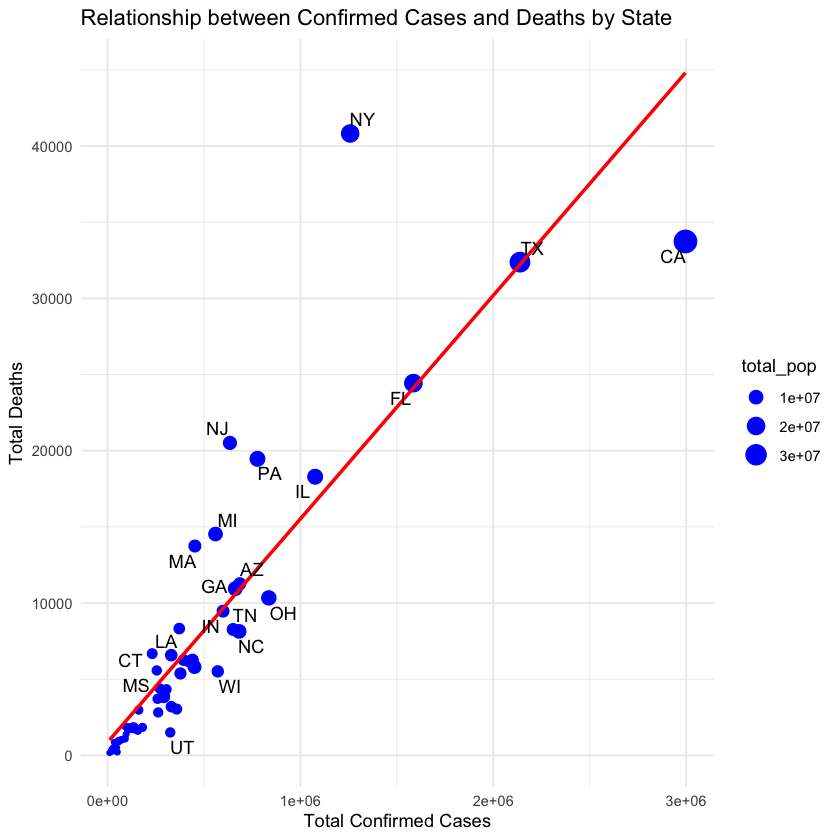

In [ ]:
# Summarize the data to get total confirmed cases and deaths by state
state_summary <- dataset_plus_census %>%
  group_by(state) %>%
  summarise(
    total_confirmed_cases = sum(confirmed_cases, na.rm = TRUE),
    total_deaths = sum(deaths, na.rm = TRUE),
    total_pop = sum(total_pop, na.rm = TRUE)
  )


# Plot using ggplot2
ggplot(state_summary, aes(x = total_confirmed_cases, y = total_deaths, label = state)) +
  geom_point(mapping = aes(size = total_pop), color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  geom_text_repel(data = subset(state_summary, total_deaths >= 1000)) +
  labs(
    title = "Relationship between Confirmed Cases and Deaths by State",
    x = "Total Confirmed Cases",
    y = "Total Deaths"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: label.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


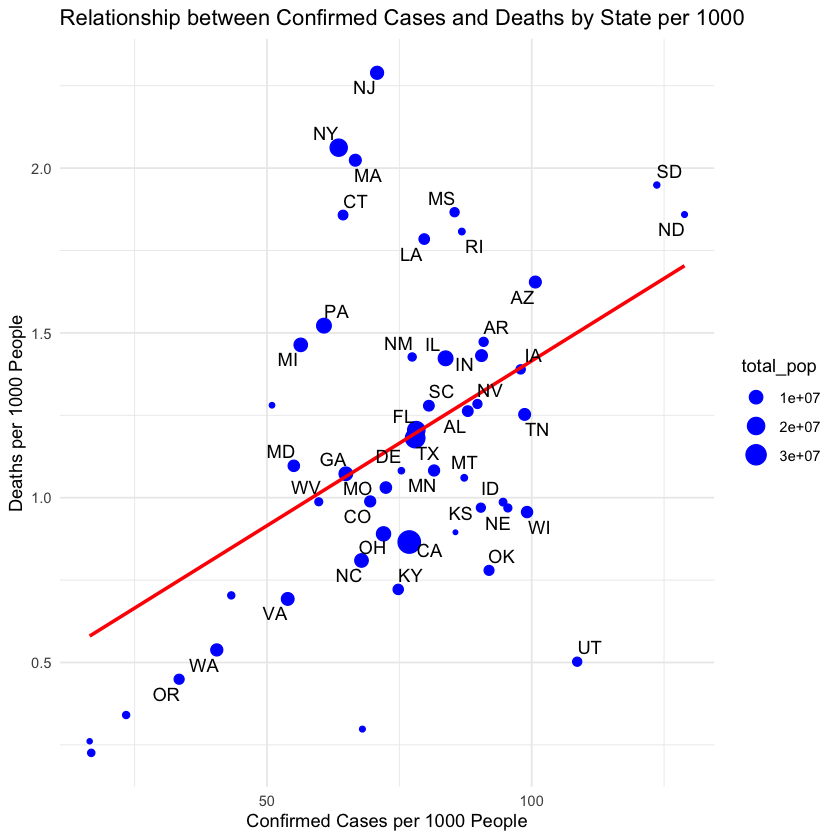

In [ ]:
# Confirmed cases and deaths per 1000 for each state

#Summarize the data to get total confirmed cases and deaths by state
state_summary_1000 <- dataset_plus_census %>%
  group_by(state) %>%
  summarise(
    total_confirmed_cases = sum(confirmed_cases, na.rm = TRUE),
    total_deaths = sum(deaths, na.rm = TRUE),
    total_pop = sum(total_pop, na.rm = TRUE)
  ) %>%
  mutate(
    confirmed_cases_per_1000 = total_confirmed_cases / total_pop * 1000,
    deaths_per_1000 = total_deaths / total_pop * 1000
  )

# Plot using ggplot2
ggplot(state_summary_1000, aes(x = confirmed_cases_per_1000, y = deaths_per_1000, label = state)) +
  geom_point(mapping = aes(size = total_pop), color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  geom_text_repel(data = subset(state_summary_1000, total_deaths >= 1000)) +
  labs(
    title = "Relationship between Confirmed Cases and Deaths by State per 1000",
    x = "Confirmed Cases per 1000 People",
    y = "Deaths per 1000 People"
  ) +
  theme_minimal()


Looking into the number of confirmed cases and deaths per 1000, we can still that the number of deaths were more than twice than that in CA even though there were more confirmed cases in CA. So the previous observation still remains valid.

## Correlation between variables related to work and number confirmed cases between NY and CA

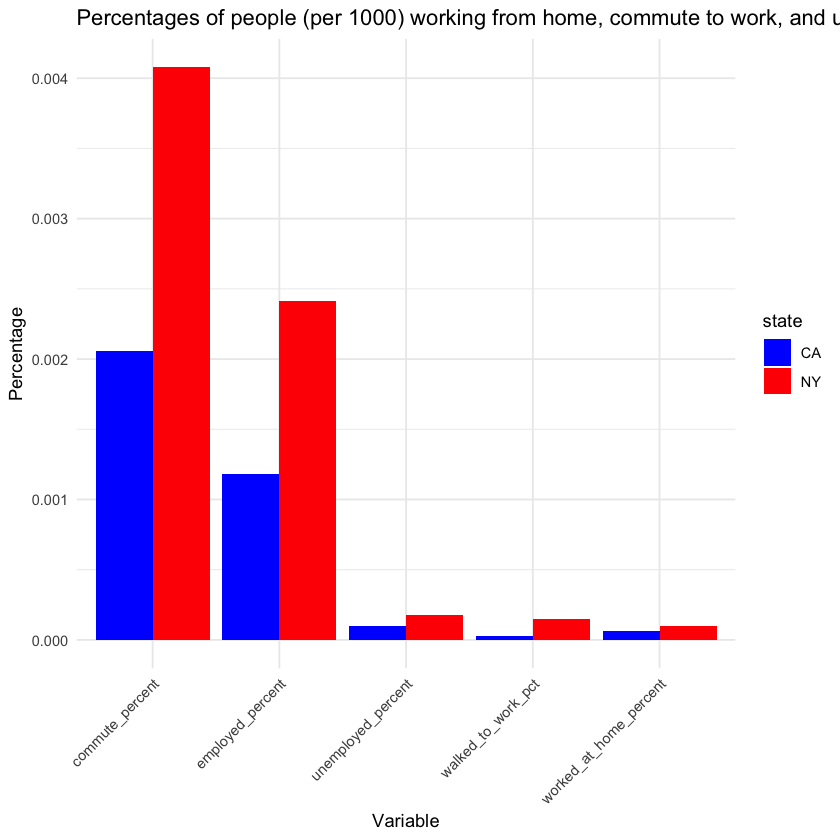

In [ ]:
# Comparition between the percentages of population in CA and NY for variables related to work (per 1000)

# Calculate the sums for each variable by state
state_totals_pop_types <- dataset_plus_census %>%
  filter(state %in% c("CA", "NY")) %>%
  group_by(state) %>%
  summarise(
    total_pop = sum(total_pop, na.rm = TRUE),
    commute = sum(commute, na.rm = TRUE) / sum(total_pop, na.rm = TRUE) * 1000,
    unemployed_pop = sum(unemployed_pop, na.rm = TRUE) / sum(total_pop, na.rm = TRUE) * 1000,
    employed_pop = sum(employed_pop, na.rm = TRUE) / sum(total_pop, na.rm = TRUE) * 1000,
    worked_at_home = sum(worked_at_home, na.rm = TRUE) / sum(total_pop, na.rm = TRUE) * 1000,
    walked_to_work = sum(walked_to_work, na.rm = TRUE) / sum(total_pop, na.rm = TRUE) * 1000
  )

# Calculate the percentages
state_totals_pop_types <- state_totals_pop_types %>%
  mutate(
    commute_percent = (commute / total_pop) * 100,
    unemployed_percent = (unemployed_pop / total_pop) * 100,
    employed_percent = (employed_pop / total_pop) * 100,
    worked_at_home_percent = (worked_at_home / total_pop) * 100,
    walked_to_work_pct = (walked_to_work / total_pop) * 100
  )

# Reshape the data for plotting
state_totals_employment <- state_totals_pop_types %>%
  select(state, commute_percent, unemployed_percent, employed_percent, worked_at_home_percent, walked_to_work_pct) %>%
  pivot_longer(cols = -state, names_to = "variable", values_to = "percentage")

# Create the bar chart
states_percent_employment <- ggplot(state_totals_employment, aes(x = variable, y = percentage, fill = state)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Percentages of people (per 1000) working from home, commute to work, and unemployed for NY & CA",
    x = "Variable",
    y = "Percentage"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("CA" = "blue", "NY" = "red")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Save the plot
ggsave("states_percent_employment.png", plot = states_percent_employment, width = 10, height = 8)
print(states_percent_employment)

More people were commuting to work and employed in NY than in CA. More people were working from home and unemployed in CA than in NY.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


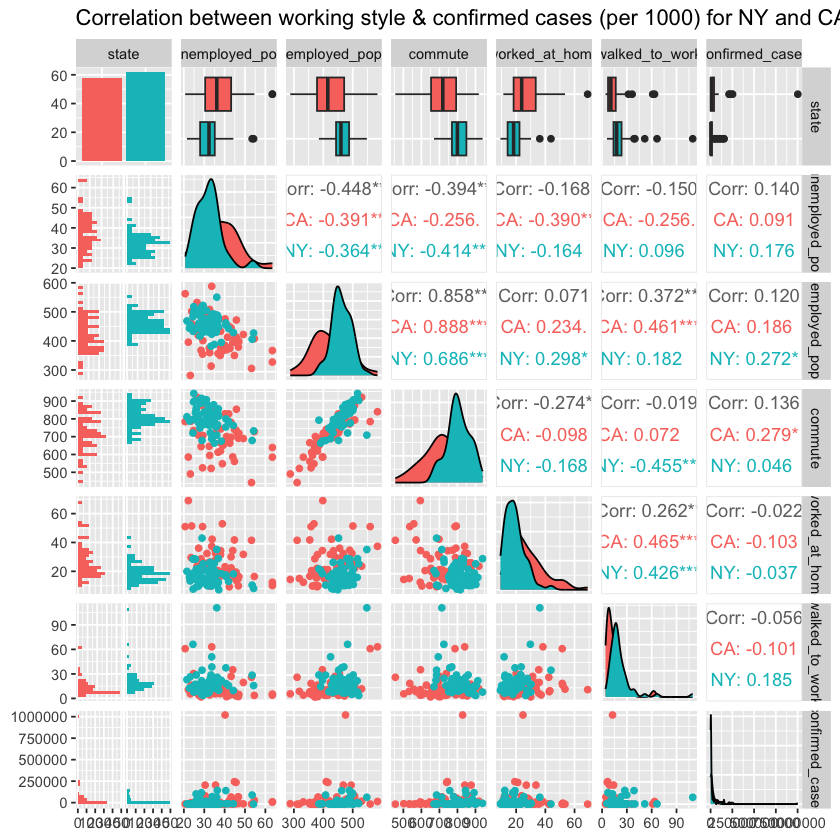

In [ ]:
# Correlation plot using ggpairs (Multifaceted Visualization)

#Filter the data for states NY and CA
filtered_data_work_confirmedCases <- dataset_plus_census %>%
  filter(state %in% c("NY", "CA")) %>%
  group_by(state) %>%
  mutate(
    unemployed_pop = (unemployed_pop / total_pop) * 1000,
    employed_pop = (employed_pop / total_pop) * 1000,
    commute = (commute / total_pop) * 1000,
    worked_at_home = (worked_at_home / total_pop) * 1000,
    walked_to_work = (walked_to_work / total_pop) * 1000,
    confirmed_cases = (confirmed_cases / total_pop) * 1000
  ) %>%
  ungroup() %>%
  select(state, unemployed_pop, employed_pop, commute, worked_at_home, walked_to_work, confirmed_cases)

# Plot correlation plot using GGally
cor_plot_work_confirmedCases_mutlifaced <- ggpairs(filtered_data_work_confirmedCases, aes(color = state), title = "Correlation between working style & confirmed cases (per 1000) for NY and CA (Multifaceted visualization)")

print(cor_plot_work_confirmedCases_mutlifaced)

# Save the plot
ggsave("corr_plot_work_confirmedCases_NY_CA_multifaceted.png", plot = cor_plot_work_confirmedCases_mutlifaced, width = 10, height = 8)

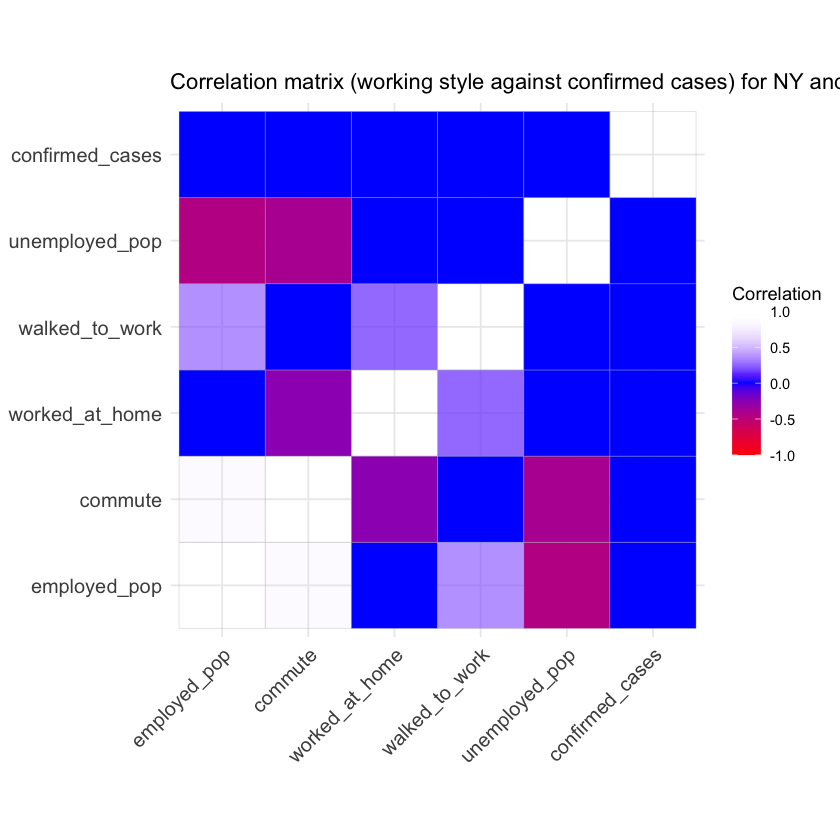

In [ ]:
# Correlation plot (Correlation Matrix Visualization)

# Compute the correlation matrix for the filtered data
cor_matrix_work_confirmedCases <- cor(filtered_data_work_confirmedCases %>% select(-state), use = "complete.obs")

# Compute p-values for the correlation matrix
p_matrix_work_confirmedCases <- cor_pmat(filtered_data_work_confirmedCases %>% select(-state))

# Define a custom color palette
custom_colors <- colorRampPalette(c("red", "white", "blue"))(2)

# Plot the correlation matrix
cor_matrix_work_confirmedCases <- ggcorrplot(cor_matrix_work_confirmedCases, p.mat = p_matrix_work_confirmedCases, insig = "blank", hc.order = TRUE, title = "Correlation matrix (working style against confirmed cases) for NY and CA (per 1000)",
                                        colors = custom_colors, legend.title = "Correlation")

# Print the plot
print(cor_matrix_work_confirmedCases)

# Save the plot
ggsave("cor_matrix_work_confirmedCases.png", plot = cor_matrix_work_confirmedCases, width = 10, height = 8)

Looking at the correlation matrix, we can see that different shades of color is not a good visual indicator for correlation values that are so close to 0. Between confirmed cases and other variables, the color is blue and is hard to see the difference.

## Correlation between various races and number confirmed cases between NY and CA

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


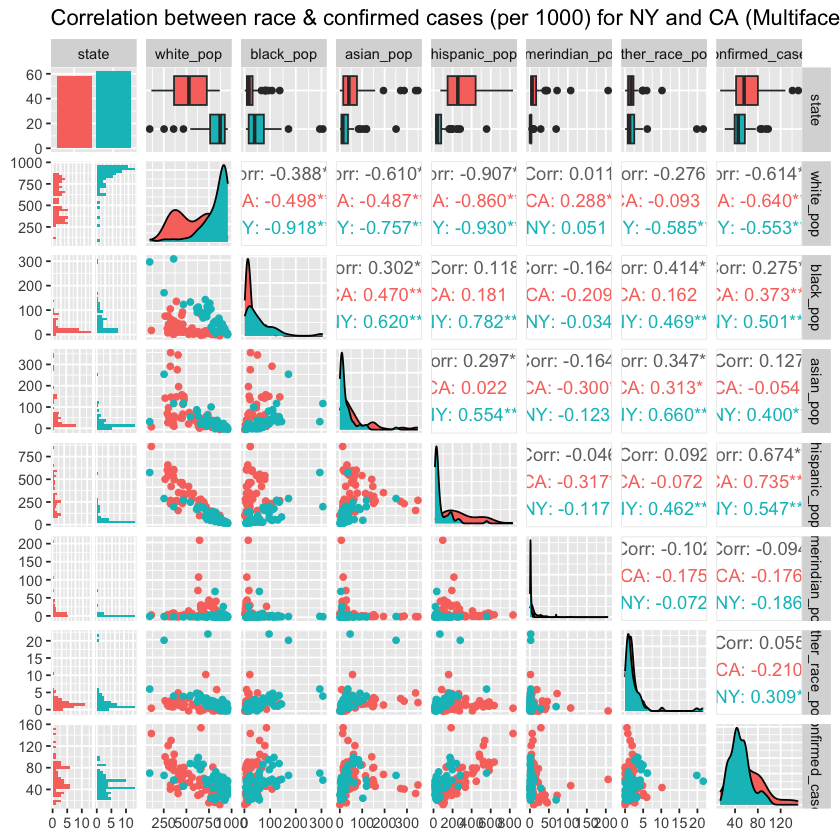

In [ ]:
# Correlation plot using ggpairs (Multifaceted Visualization)

#Filter the data for states NY and CA
filtered_data_race_confirmedCases <- dataset_plus_census %>%
  filter(state %in% c("NY", "CA")) %>%
  group_by(state) %>%
  mutate(
    white_pop = (white_pop / total_pop) * 1000,
    black_pop = (black_pop / total_pop) * 1000,
    asian_pop = (asian_pop / total_pop) * 1000,
    hispanic_pop = (hispanic_pop / total_pop) * 1000,
    amerindian_pop = (amerindian_pop / total_pop) * 1000,
    other_race_pop = (other_race_pop / total_pop) * 1000,
    confirmed_cases = (confirmed_cases / total_pop) * 1000
  ) %>%
  ungroup() %>%
  select(state, white_pop, black_pop, asian_pop, hispanic_pop, amerindian_pop, other_race_pop, confirmed_cases)

# Plot correlation plot using GGally
cor_plot_race_confirmedCases_mutlifaced <- ggpairs(filtered_data_race_confirmedCases, aes(color = state), title = "Correlation between race & confirmed cases (per 1000) for NY and CA (Multifaceted visualization)")

print(cor_plot_race_confirmedCases_mutlifaced)

# Save the plot
ggsave("cor_plot_race_confirmedCases_mutlifaced.png", plot = cor_plot_race_confirmedCases_mutlifaced, width = 10, height = 8)

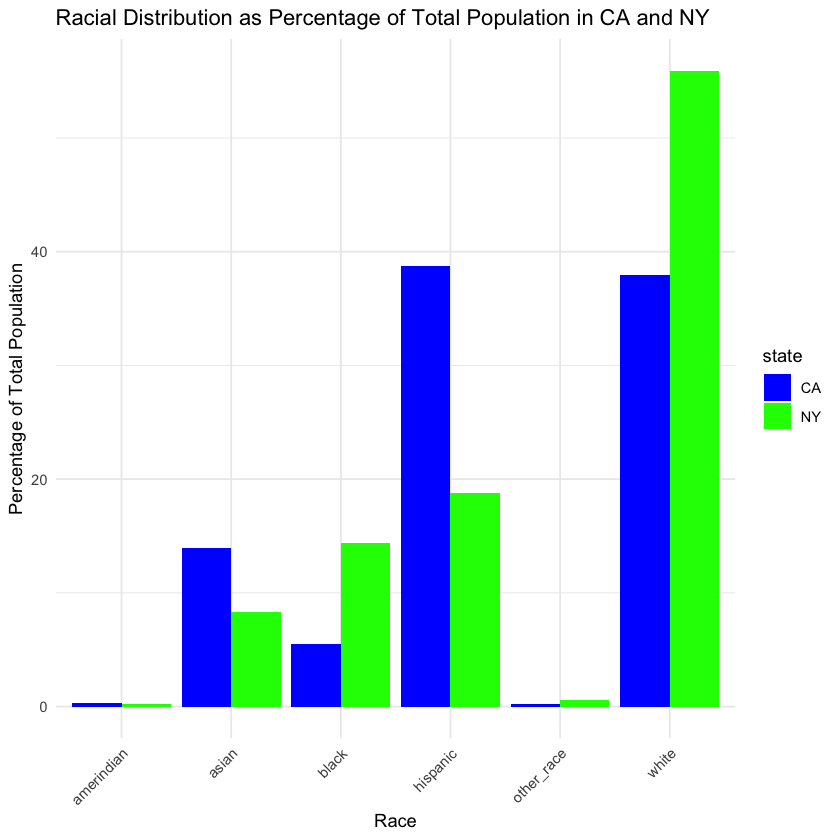

In [ ]:
# Percentage of population per race for CA and NY

# Filter data for CA and NY
filtered_data_race <- dataset_plus_census %>%
  filter(state %in% c("CA", "NY"))

# Compute total population by race for each state
race_totals <- filtered_data_race %>%
  group_by(state) %>%
  summarise(
    total_white_pop = sum(white_pop, na.rm = TRUE),
    total_black_pop = sum(black_pop, na.rm = TRUE),
    total_asian_pop = sum(asian_pop, na.rm = TRUE),
    total_hispanic_pop = sum(hispanic_pop, na.rm = TRUE),
    total_amerindian_pop = sum(amerindian_pop, na.rm = TRUE),
    total_other_race_pop = sum(other_race_pop, na.rm = TRUE),
    total_pop = sum(total_pop, na.rm = TRUE)
  )

# Compute percentage of population for each race
race_percentage <- race_totals %>%
  mutate(
    percent_white = (total_white_pop / total_pop) * 100,
    percent_black = (total_black_pop / total_pop) * 100,
    percent_asian = (total_asian_pop / total_pop) * 100,
    percent_hispanic = (total_hispanic_pop / total_pop) * 100,
    percent_amerindian = (total_amerindian_pop / total_pop) * 100,
    percent_other_race = (total_other_race_pop / total_pop) * 100
  )

# Convert the data to a long format for plotting
race_percentage_long <- race_percentage %>%
  select(state, starts_with("percent_")) %>%
  pivot_longer(
    cols = starts_with("percent_"),
    names_to = "race",
    values_to = "percentage"
  )

# Clean the race names for better readability
race_percentage_long$race <- gsub("percent_", "", race_percentage_long$race)

# Plot histograms
percentage_race <- ggplot(race_percentage_long, aes(x = race, y = percentage, fill = state)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Racial Distribution as Percentage of Total Population in CA and NY",
    x = "Race",
    y = "Percentage of Total Population"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("CA" = "blue", "NY" = "green")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Save the plot
ggsave("percentage_race.png", plot = percentage_race, width = 10, height = 8)
print(percentage_race)

Distribution of the population based on race is not contributing factor for the weak/strong correlation between confirmed cases and race.

## Correlation between income and number confirmed cases between NY and CA

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


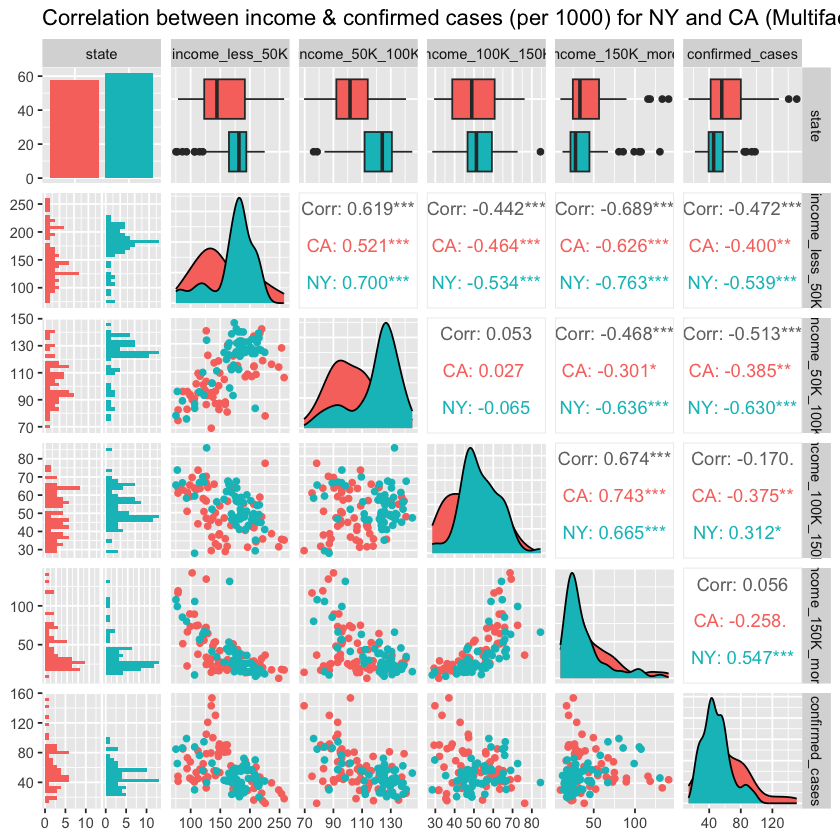

In [ ]:
# Correlation plot between income and confirmed cases

#Filter the data for states NY and CA
filtered_data_income_confirmedCases <- dataset_plus_census %>%
  filter(state %in% c("NY", "CA")) %>%
  group_by(state) %>%
  mutate(
    income_less_50K = (income_less_50K / total_pop) * 1000,
    income_50K_100K = (income_50K_100K / total_pop) * 1000,
    income_100K_150K = (income_100K_150K / total_pop) * 1000,
    income_150K_more = (income_150K_more / total_pop) * 1000,
    confirmed_cases = (confirmed_cases / total_pop) * 1000
  ) %>%
  ungroup() %>%
  select(state, income_less_50K, income_50K_100K, income_100K_150K, income_150K_more, confirmed_cases)

# Plot correlation plot using GGally
cor_plot_income_confirmedCases_mutlifaced <- ggpairs(filtered_data_income_confirmedCases, aes(color = state), title = "Correlation between income & confirmed cases (per 1000) for NY and CA (Multifaceted visualization)")

print(cor_plot_income_confirmedCases_mutlifaced)

# Save the plot
ggsave("cor_plot_income_confirmedCases_mutlifaced.png", plot = cor_plot_income_confirmedCases_mutlifaced, width = 10, height = 8)

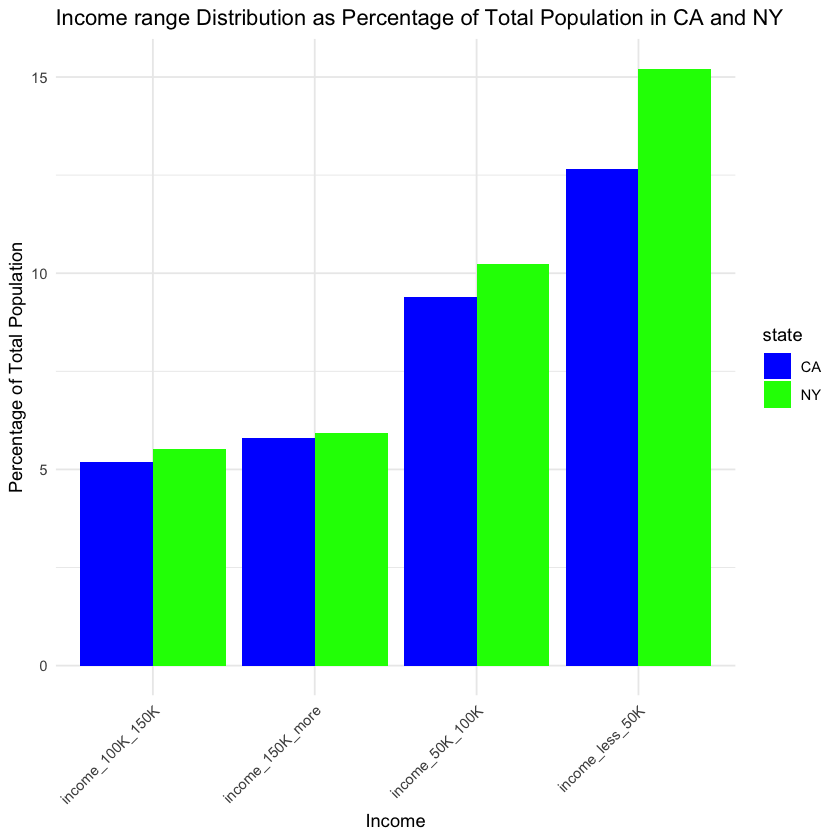

In [ ]:
# Percentage of population per race for CA and NY

# Filter data for CA and NY
filtered_data_income <- dataset_plus_census %>%
  filter(state %in% c("CA", "NY"))

# Compute total population by race for each state
income_totals <- filtered_data_race %>%
  group_by(state) %>%
  summarise(
    income_less_50K = sum(income_less_50K, na.rm = TRUE),
    income_50K_100K = sum(income_50K_100K, na.rm = TRUE),
    income_100K_150K = sum(income_100K_150K, na.rm = TRUE),
    income_150K_more = sum(income_150K_more, na.rm = TRUE),
    total_pop = sum(total_pop, na.rm = TRUE)
  )

# Compute percentage of population for each income range
income_percentage <- income_totals %>%
  mutate(
    percent_income_less_50K = (income_less_50K / total_pop) * 100,
    percent_income_50K_100K = (income_50K_100K / total_pop) * 100,
    percent_income_100K_150K = (income_100K_150K / total_pop) * 100,
    percent_income_150K_more = (income_150K_more / total_pop) * 100
  )

# Convert the data to a long format for plotting
income_percentage_long <- income_percentage %>%
  select(state, starts_with("percent_")) %>%
  pivot_longer(
    cols = starts_with("percent_"),
    names_to = "income",
    values_to = "percentage"
  )

# Clean the income ranges names for better readability
income_percentage_long$income <- gsub("percent_", "", income_percentage_long$income)

# Plot histograms
percentage_income <- ggplot(income_percentage_long, aes(x = income, y = percentage, fill = state)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Income range Distribution as Percentage of Total Population in CA and NY",
    x = "Income",
    y = "Percentage of Total Population"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("CA" = "blue", "NY" = "green")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Save the plot
ggsave("percentage_income.png", plot = percentage_income, width = 10, height = 8)
print(percentage_income)

## Correlation between age (male or female) and number confirmed cases between NY and CA

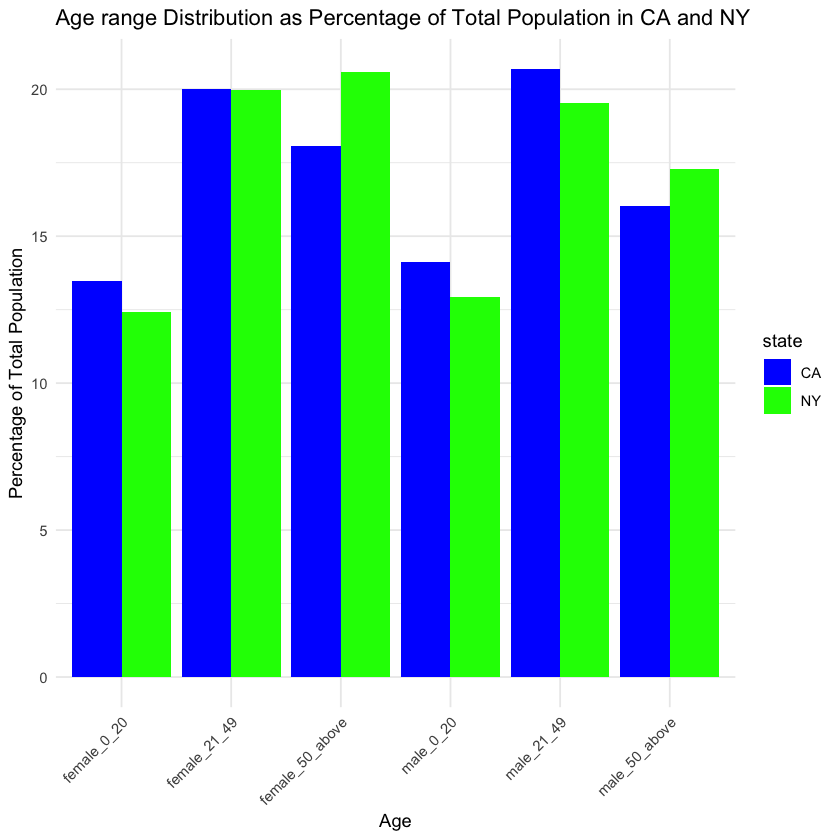

In [ ]:
# Percentage of population per race for CA and NY

# Filter data for CA and NY
filtered_data_age <- dataset_plus_census %>%
  filter(state %in% c("CA", "NY"))

# Compute total population by race for each state
age_totals <- filtered_data_age %>%
  group_by(state) %>%
  summarise(
    male_0_20 = sum(male_0_20, na.rm = TRUE),
    male_21_49 = sum(male_21_49, na.rm = TRUE),
    male_50_above = sum(male_50_above, na.rm = TRUE),
    female_0_20 = sum(female_0_20, na.rm = TRUE),
    female_21_49 = sum(female_21_49, na.rm = TRUE),
    female_50_above = sum(female_50_above, na.rm = TRUE),
    total_pop = sum(total_pop, na.rm = TRUE)
  )

# Compute percentage of population for each age range
age_percentage <- age_totals %>%
  mutate(
    percent_male_0_20 = (male_0_20 / total_pop) * 100,
    percent_male_21_49 = (male_21_49 / total_pop) * 100,
    percent_male_50_above = (male_50_above / total_pop) * 100,
    percent_female_0_20 = (female_0_20 / total_pop) * 100,
    percent_female_21_49 = (female_21_49 / total_pop) * 100,
    percent_female_50_above = (female_50_above / total_pop) * 100,
  )

# Convert the data to a long format for plotting
age_percentage_long <- age_percentage %>%
  select(state, starts_with("percent_")) %>%
  pivot_longer(
    cols = starts_with("percent_"),
    names_to = "age",
    values_to = "percentage"
  )

# Clean the age ranges names for better readability
age_percentage_long$age <- gsub("percent_", "", age_percentage_long$age)

# Plot histograms
percentage_age <- ggplot(age_percentage_long, aes(x = age, y = percentage, fill = state)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Age range Distribution as Percentage of Total Population in CA and NY",
    x = "Age",
    y = "Percentage of Total Population"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("CA" = "blue", "NY" = "green")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Save the plot
ggsave("percentage_age.png", plot = percentage_age, width = 10, height = 8)
print(percentage_age)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


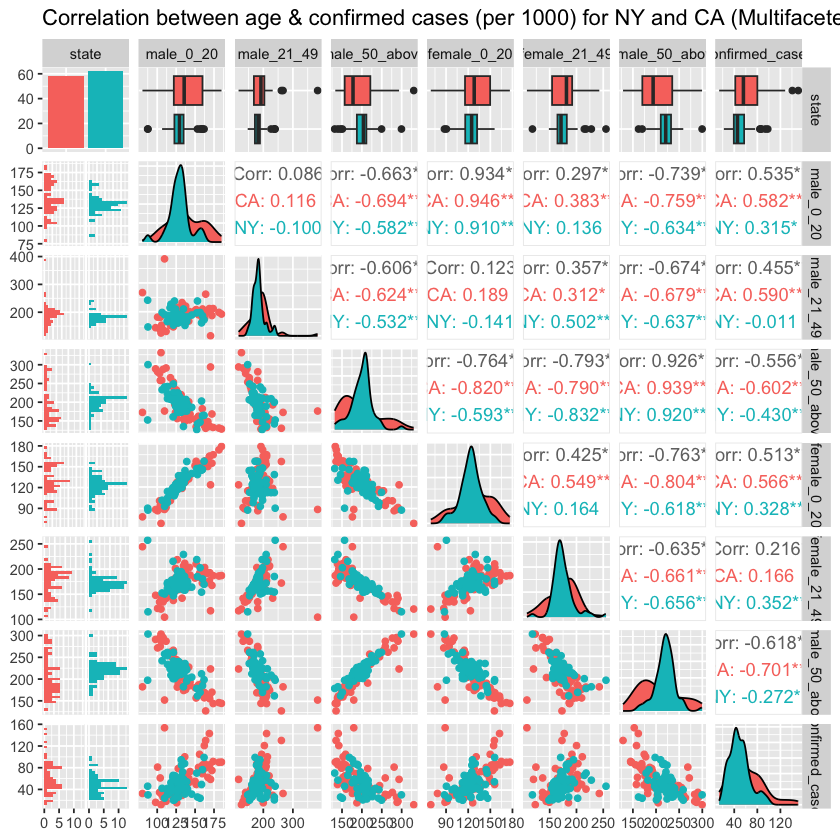

In [ ]:
# Correlation plot between income and confirmed cases

#Filter the data for states NY and CA
filtered_data_age_confirmedCases <- dataset_plus_census %>%
  filter(state %in% c("NY", "CA")) %>%
  group_by(state) %>%
  mutate(
    male_0_20 = (male_0_20 / total_pop) * 1000,
    male_21_49 = (male_21_49 / total_pop) * 1000,
    male_50_above = (male_50_above / total_pop) * 1000,
    female_0_20 = (female_0_20 / total_pop) * 1000,
    female_21_49 = (female_21_49 / total_pop) * 1000,
    female_50_above = (female_50_above / total_pop) * 1000,
    confirmed_cases = (confirmed_cases / total_pop) * 1000
  ) %>%
  ungroup() %>%
  select(state, male_0_20, male_21_49, male_50_above, female_0_20, female_21_49, female_50_above, confirmed_cases)

# Plot correlation plot using GGally
cor_plot_age_confirmedCases_mutlifaced <- ggpairs(filtered_data_age_confirmedCases, aes(color = state), title = "Correlation between age & confirmed cases (per 1000) for NY and CA (Multifaceted visualization)")

print(cor_plot_age_confirmedCases_mutlifaced)

# Save the plot
ggsave("cor_plot_age_confirmedCases_mutlifaced.png", plot = cor_plot_age_confirmedCases_mutlifaced, width = 10, height = 8)

## Correlation between rent spending and number confirmed cases between NY and CA

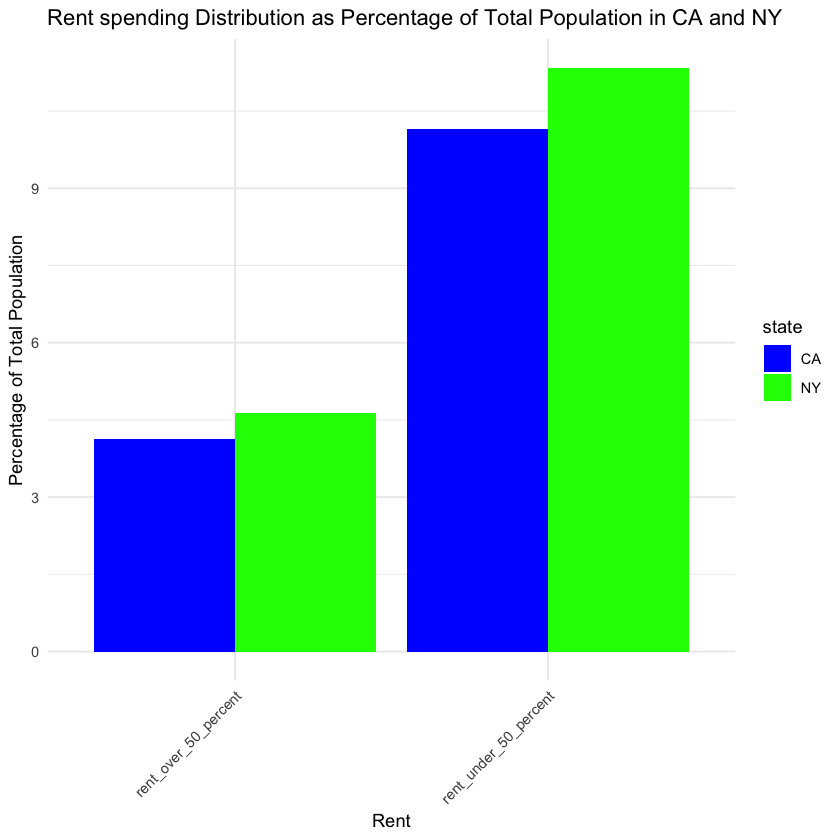

In [ ]:
# Percentage of population per race for CA and NY

# Filter data for CA and NY
filtered_data_rent <- dataset_plus_census %>%
  filter(state %in% c("CA", "NY"))

# Compute total population by rent spending for each state
rent_totals <- filtered_data_rent %>%
  group_by(state) %>%
  summarise(
    rent_under_50_percent = sum(rent_under_50_percent, na.rm = TRUE),
    rent_over_50_percent = sum(rent_over_50_percent, na.rm = TRUE),
    total_pop = sum(total_pop, na.rm = TRUE)
  )

# Compute percentage of population for rent spendings
rent_percentage <- rent_totals %>%
  mutate(
    percent_rent_under_50_percent = (rent_under_50_percent / total_pop) * 100,
    percent_rent_over_50_percent = (rent_over_50_percent / total_pop) * 100
  )

# Convert the data to a long format for plotting
rent_percentage_long <- rent_percentage %>%
  select(state, starts_with("percent_")) %>%
  pivot_longer(
    cols = starts_with("percent_"),
    names_to = "rent",
    values_to = "percentage"
  )

# Clean the age ranges names for better readability
rent_percentage_long$rent <- gsub("percent_", "", rent_percentage_long$rent)

# Plot histograms
percentage_rent <- ggplot(rent_percentage_long, aes(x = rent, y = percentage, fill = state)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Rent spending Distribution as Percentage of Total Population in CA and NY",
    x = "Rent",
    y = "Percentage of Total Population"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("CA" = "blue", "NY" = "green")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Save the plot
ggsave("percentage_rent.png", plot = percentage_rent, width = 10, height = 8)
print(percentage_rent)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


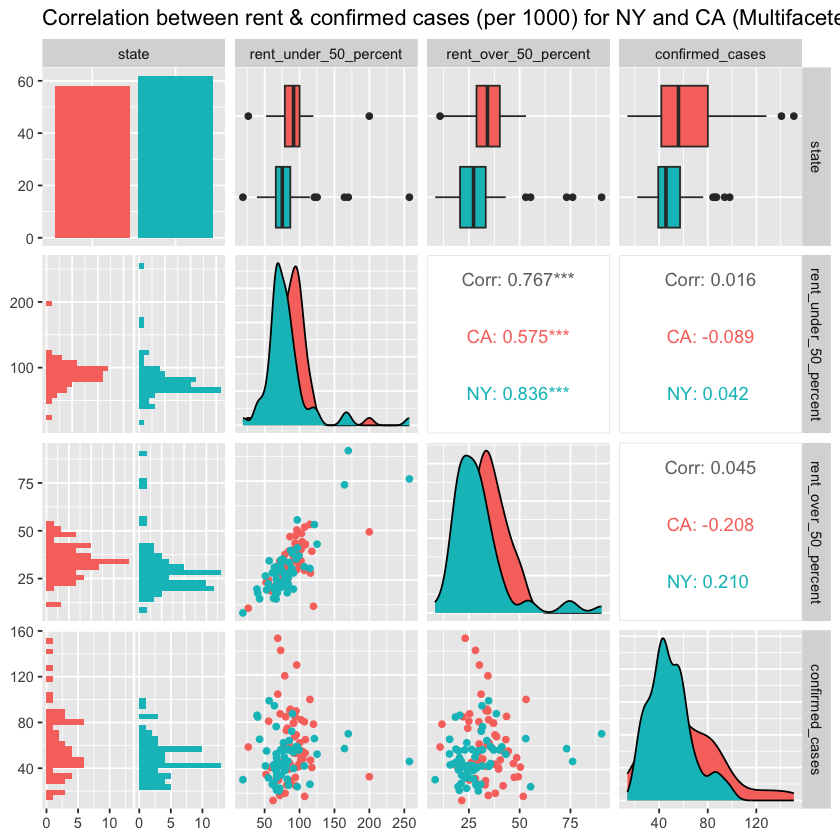

In [ ]:
# Correlation plot between rent spending and confirmed cases

#Filter the data for states NY and CA
filtered_data_rent_confirmedCases <- dataset_plus_census %>%
  filter(state %in% c("NY", "CA")) %>%
  group_by(state) %>%
  mutate(
    rent_under_50_percent = (rent_under_50_percent / total_pop) * 1000,
    rent_over_50_percent = (rent_over_50_percent / total_pop) * 1000,
    confirmed_cases = (confirmed_cases / total_pop) * 1000
  ) %>%
  ungroup() %>%
  select(state, rent_under_50_percent, rent_over_50_percent, confirmed_cases)

# Plot correlation plot using GGally
cor_plot_rent_confirmedCases_mutlifaced <- ggpairs(filtered_data_rent_confirmedCases, aes(color = state), title = "Correlation between rent & confirmed cases (per 1000) for NY and CA (Multifaceted visualization)")

print(cor_plot_rent_confirmedCases_mutlifaced)

# Save the plot
ggsave("cor_plot_rent_confirmedCases_mutlifaced.png", plot = cor_plot_rent_confirmedCases_mutlifaced, width = 10, height = 8)

In [3]:
# Convert the notebook to HTML
system(paste("jupyter nbconvert --to html", "DataMining_Project1_plus_census.ipynb"))